In [71]:
import pandas as pd
import numpy as np
import csv
import os
import glob
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import xarray as xr
import ftplib
import re
import shapefile as shp

def at(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [at(c) for c in re.split(r'(\d+)', text)]

list_arg=["ARS%.2d" % i for i in range(1,121)]

# Enter Date 
Enter_Date='20210613'  ##format "YYMMDD"
date1=pd.to_datetime(Enter_Date)
date2=date1+pd.Timedelta(days=1)
date3=date1-pd.Timedelta(days=1)
# date3.strftime('%d-%B,%Y %H:%M:%S'),date1.strftime('%d-%B,%Y %H:%M:%S'),date2.strftime('%d-%B,%Y %H:%M:%S')

# DATA READING FROM FTP

In [72]:
## Login to ftp server

ftp =ftplib.FTP('103.251.184.105', 'cellnet', '5%1E8bD%Db@')

### Data downloading from FTP
for arg in list_arg[0:120]:
    ftp =ftplib.FTP('103.251.184.105', 'cellnet', '5%1E8bD%Db@')
    ftp.cwd('/'+arg+'/')          ### Server dir change

#     os.chdir('D:/DATA/ARG/'+arg)   ### Desktop Dir Change
    os.chdir('/home/PDTC/PDTCCAIPEEX/jrao/Data/IMRAN/ARS/'+arg)

    nlst=ftp.nlst()
    nlst.sort(key=natural_keys)
    nlst11=pd.Series(nlst)
    nlst12=nlst11[(nlst11.str.contains(arg+'_'+date1.strftime('%y%m%d'))) |
                  (nlst11.str.contains(arg+'_'+date2.strftime('%y%m%d'))) |
                  (nlst11.str.contains(arg+'_'+date3.strftime('%y%m%d'))) ]
                  
    for filename in nlst12:                ## last '[n]' files doenload
        with open(filename,'wb') as file:
            ftp.retrbinary(f'RETR {filename}',file.write)
    print(arg)
ftp.close()

ARS01
ARS02
ARS03
ARS04
ARS05
ARS06
ARS07
ARS08
ARS09
ARS10
ARS11
ARS12
ARS13
ARS14
ARS15
ARS16
ARS17
ARS18
ARS19
ARS20
ARS21
ARS22
ARS23
ARS24
ARS25
ARS26
ARS27
ARS28
ARS29
ARS30
ARS31
ARS32
ARS33
ARS34
ARS35
ARS36
ARS37
ARS38
ARS39
ARS40
ARS41
ARS42
ARS43
ARS44
ARS45
ARS46
ARS47
ARS48
ARS49
ARS50
ARS51
ARS52
ARS53
ARS54
ARS55
ARS56
ARS57
ARS58
ARS59
ARS60
ARS61
ARS62
ARS63
ARS64
ARS65
ARS66
ARS67
ARS68
ARS69
ARS70
ARS71
ARS72
ARS73
ARS74
ARS75
ARS76
ARS77
ARS78
ARS79
ARS80
ARS81
ARS82
ARS83
ARS84
ARS85
ARS86
ARS87
ARS88
ARS89
ARS90
ARS91
ARS92
ARS93
ARS94
ARS95
ARS96
ARS97
ARS98
ARS99
ARS100
ARS101
ARS102
ARS103
ARS104
ARS105
ARS106
ARS107
ARS108
ARS109
ARS110
ARS111
ARS112
ARS113
ARS114
ARS115
ARS116
ARS117
ARS118
ARS119
ARS120


In [73]:
# nlst11=pd.Series(nlst)
# nlst12=nlst11[nlst11.str.contains('ARS01_210601') | nlst11.str.contains('ARS01_210602') ]
# nlst12

In [74]:
# files.sort(key=os.path.getmtime)
# print("\n".join(files))

In [84]:
for kk in range(0,1):
    files11=pd.Series(glob.glob('/home/PDTC/PDTCCAIPEEX/jrao/Data/IMRAN/ARS/'+list_arg[kk]+'/*.txt'))
    files=files11[(files11.str.contains(list_arg[kk]+'_'+date1.strftime('%y%m%d'))) | 
                  (files11.str.contains(list_arg[kk]+'_'+date2.strftime('%y%m%d'))) |
                  (files11.str.contains(list_arg[kk]+'_'+date3.strftime('%y%m%d')))].values
    
    data=[]
    for j in range(len(files)):
        
#         print(files[j])
        rs_day=[]
        with open(files[j], 'r') as csvfile:
    #         reader = csv.reader(csvfile, delimiter='\t')
            reader = csv.reader(x.replace('\0', '') for x in csvfile)
            for row in reader:
                if (len(row) == 0):
                    continue
                rs_day.append(row)
        rs_data=pd.DataFrame(rs_day)
        
        if(len(rs_data))>5:
            
            date_index=rs_data[rs_data[0].str.startswith('DATE')].index
            date_index=date_index.insert(len(date_index)+1,rs_data.index[-1])
            date=pd.DataFrame(list(rs_data[rs_data[0].str.startswith('DATE')][0].str.split('=')))[1]
            time=pd.DataFrame(list(rs_data[rs_data[0].str.startswith('TIME')][0].str.split('=')))[1]
            dtime=pd.to_datetime(date+time,format='%d/%m/%y%H:%M:%S')-pd.Timedelta(minutes=1)

            ss=pd.DataFrame(list(rs_data[(rs_data[0].str.startswith('Rain'))&(rs_data[1].str.startswith('mm'))].iloc[:,1].str.split(':')))
            dd=[]
            for i in range(len(date_index)-1):
#                 count=rs_data[date_index[i]:date_index[i+1]+1][0].str.startswith('Rain,mm').sum()
                temp=rs_data[date_index[i]:date_index[i+1]+1]
                count=((temp[0].str.startswith('Rain'))&(temp[1].str.startswith('mm'))).sum()
                dd.extend(pd.date_range(dtime[i], periods = count, freq='-1Min')[::-1])

            if (len(ss) == 0):
                    continue
#             if len(ss)<0:
            ss['Date']=dd
            data.extend(ss[['Date',1]].values)
        
    arg_data=pd.DataFrame(data,columns=['Date','Rain_mm'])
    arg_data=arg_data.replace({'':np.nan,' ':np.nan}).dropna().reset_index(drop=True)
    arg_data=arg_data[~arg_data.Rain_mm.str.contains("IMEI")].reset_index(drop=True)
    arg_data['Rain_mm']=arg_data['Rain_mm'].astype(float)
    arg_data=arg_data.sort_values(by=['Date'])
    arg_data.loc[((arg_data['Rain_mm']*10)%2)!=0,['Rain_mm']]=arg_data.loc[((arg_data['Rain_mm']*10)%2)!=0]['Rain_mm']-0.1
#     arg_data.to_csv()
    vars()[list_arg[kk]]=arg_data.copy()
    print(list_arg[kk])

ARS01


In [88]:
# arg_data

In [91]:
# q1=arg_data.set_index('Date').to_xarray()
# q1.to_netcdf('D:/DATA/ARG/'+list_arg[kk]+'/'+arg_data.iloc[0,0].strftime('%Y%m%d%H%M%S.nc'))

In [77]:
# ##### Error Detection/Identification ###
# for x in  range(len(arg_data['Rain_mm'])):#.str.strip())):
#     print(float(arg_data['Rain_mm'][x]),x)

In [78]:
def get_gap(mwr1):
    x1=[]
    for kk in range(len(mwr1)-1):
        if (mwr1['Date'][kk+1]-mwr1['Date'][kk])>=datetime.timedelta(minutes=3):
            x1.append(mwr1['Date'][kk]+datetime.timedelta(seconds=1))
            x1.append(mwr1['Date'][kk+1]-datetime.timedelta(seconds=1))

    x2=pd.DataFrame({'Date':x1})
    df2=mwr1.append(x2, ignore_index=True)
    df2=df2.sort_values(by='Date',ascending=True)

    return df2

In [105]:
# Find one day accumulated rain .......... find top 10 ARG ##
max_rf=[]
for arg in list_arg:
#     print(arg)
#     vars()[arg+'_arg']=vars()[arg][vars()[arg]['Date'].between(pd.to_datetime('20210601 0:0:0',format='%Y%m%d %H:%M:%S'),
#                                                               pd.to_datetime('20210602 23:59:59',format='%Y%m%d %H:%M:%S'))]
    vars()[arg+'_arg']=vars()[arg][vars()[arg]['Date'].between(date1,date2)]
    if (len(vars()[arg+'_arg'])==0):
        max_rf.append(np.nan)
        continue
        
    max_rf.append(vars()[arg+'_arg']['Rain_mm'].iloc[-1]-vars()[arg+'_arg']['Rain_mm'].iloc[0])
#     max_rf.append((vars()[arg+'_arg']['Rain_mm']-vars()[arg+'_arg']['Rain_mm'].iloc[0]).max())
    vars()[arg+'_arg']['Rain_mm']=vars()[arg+'_arg']['Rain_mm']-vars()[arg+'_arg']['Rain_mm'].iloc[0] ## substract old count
    vars()[arg+'_arg'].reset_index(drop=True,inplace=True)
    vars()[arg+'_arg']=get_gap(vars()[arg+'_arg'])
    print(arg)
# top_10arg=pd.DataFrame({'ARG':(pd.Series(list_arg)+'_arg'),'max_rf':max_rf}).sort_values(by=['max_rf'],ascending=False)['ARG'][:10].values
active_rg=pd.DataFrame({'ARG':(pd.Series(list_arg)+'_arg'),'max_rf':max_rf}).sort_values(by=['max_rf'],ascending=False).dropna()['ARG'].values

<ipython-input-105-03d8053dbee3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars()[arg+'_arg']['Rain_mm']=vars()[arg+'_arg']['Rain_mm']-vars()[arg+'_arg']['Rain_mm'].iloc[0] ## substract old count


ARS01
ARS03
ARS05
ARS06
ARS07
ARS08
ARS09
ARS12
ARS14
ARS16
ARS19
ARS20
ARS21
ARS22
ARS23
ARS24
ARS25
ARS26
ARS27
ARS30
ARS32
ARS36
ARS37
ARS38
ARS39
ARS40
ARS41
ARS42
ARS44
ARS45
ARS46
ARS47
ARS48
ARS49
ARS50
ARS51
ARS52
ARS53
ARS54
ARS55
ARS57
ARS58
ARS59
ARS60
ARS61
ARS63
ARS65
ARS66
ARS67
ARS69
ARS71
ARS76
ARS77
ARS78
ARS79


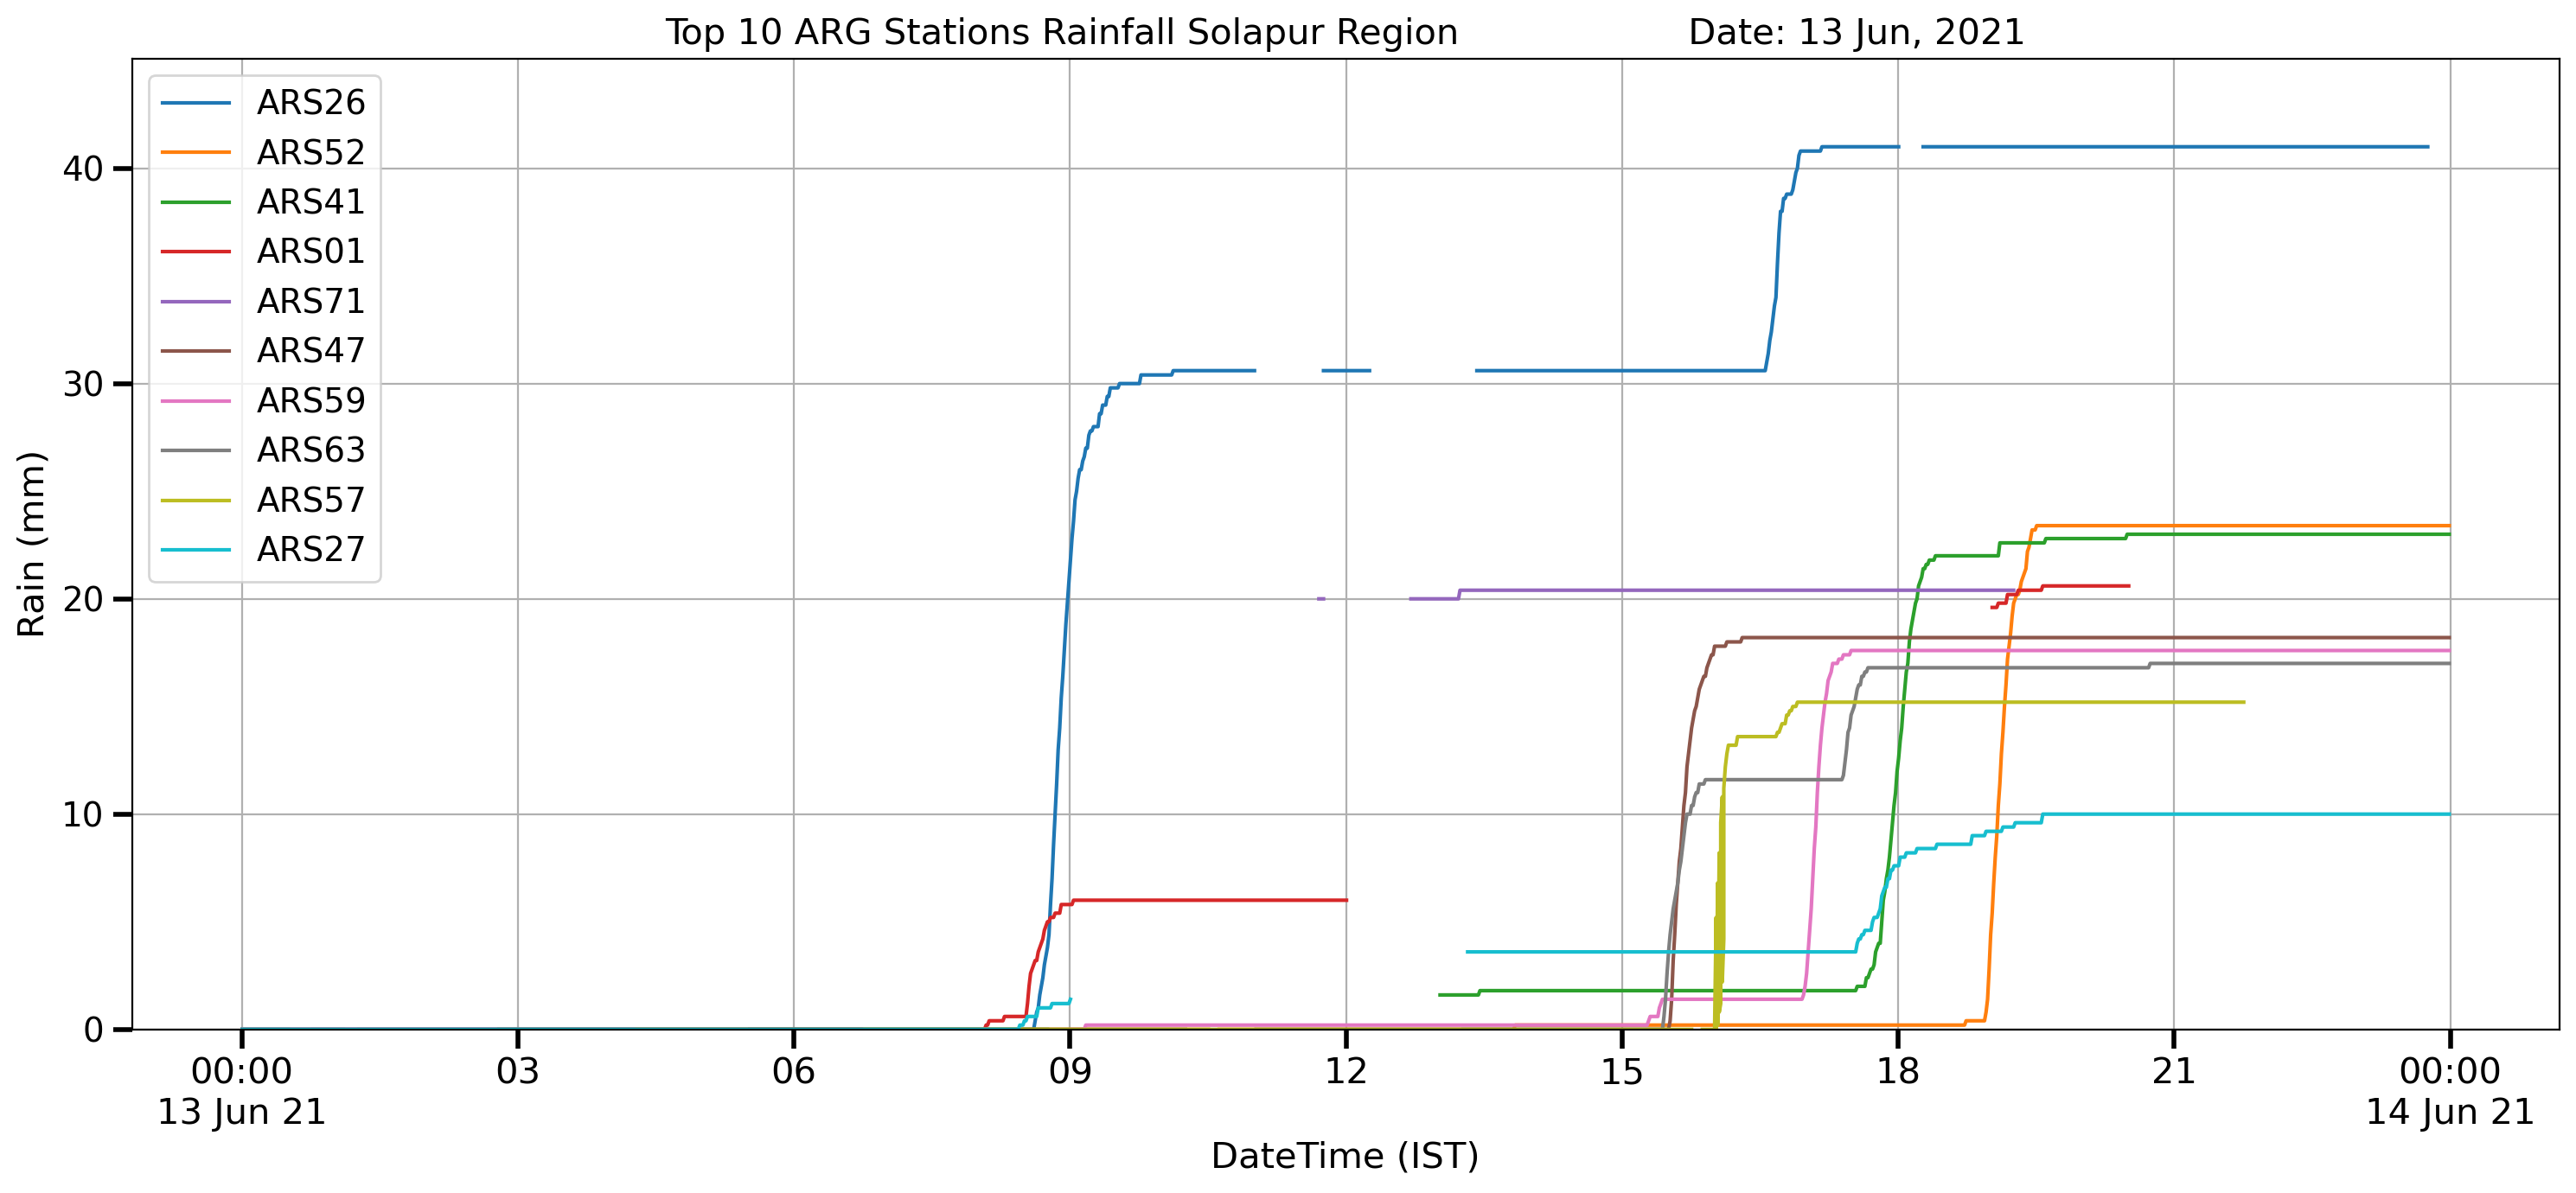

In [106]:
## plot top 10 ARG ##
fig=plt.figure(figsize=[15,7],dpi=200)
for x in range(len(active_rg[:10])):
    plt.plot(vars()[active_rg[x]]['Date'],vars()[active_rg[x]]['Rain_mm'],label=active_rg[x].split('_')[0])
    plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%d %b %y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_minor_locator(HourLocator(np.arange(0, 25, 3)))
plt.gca().xaxis.set_minor_formatter(DateFormatter('%H'))
plt.tick_params(axis='both', which='major', labelsize=15,direction='out',length=8, width=2)
plt.tick_params(axis='both', which='minor', labelsize=15,direction='out',length=8, width=2)

plt.ylabel('Rain (mm)',fontsize=15)
plt.xlabel('DateTime (IST)',fontsize=15)
plt.title('Top 10 ARG Stations Rainfall Solapur Region'+'  '*10+'Date: '+vars()[active_rg[0]]['Date'][0].strftime('%d %b, %Y'),fontsize=15)
plt.legend(loc='upper left',fontsize=14)
plt.xticks(fontsize=15);plt.yticks(fontsize=14)
plt.ylim(0,max(max_rf)*1.1)
plt.tight_layout();plt.grid(which='both')
# ax.xaxis.grid(True, which='minor')
plt.savefig('/home/PDTC/PDTCCAIPEEX/jrao/Data/IMRAN/ARS/ARG_Plots/'+vars()[active_rg[0]]['Date'][0].strftime('ARG_SLP_Top10ARG_Rf_%d%m%Y.jpg'),bbox_inches="tight",dpi=150)

In [81]:
pos_df=pd.read_csv('/home/PDTC/PDTCCAIPEEX/jrao/Data/IMRAN/ARS/SLP_ARG_lat_long.csv')
pos_df['max_rf']=max_rf
pos_df=pos_df.dropna()
pos_df=pos_df.sort_values(by=['max_rf'],ascending=False)

# Geopandas

<Figure size 1500x1050 with 0 Axes>

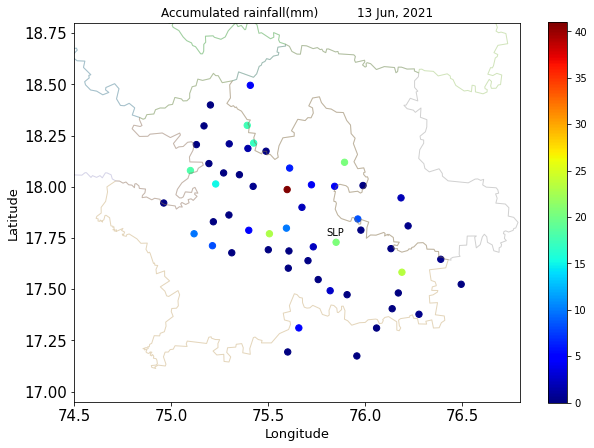

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

fp = '/home/PDTC/PDTCCAIPEEX/jrao/Data/IMRAN/ARS/SHAPEFILES/maharashtra_administrative/maharashtra_administrative.shp'
map_df = gpd.read_file(fp)
map_df.head()

fig=plt.figure(figsize=[10,7],dpi=150)
map_df.iloc[[17,11,41,39,45],:].plot(figsize=[10,7],cmap='Dark2',linewidth=1,alpha=0.3)
plt.scatter(pos_df['long'],pos_df['lat'],c=pos_df['max_rf'],vmin=0,vmax=max(max_rf),cmap='jet',s=40)
plt.colorbar()
# plt.plot(75.850609,17.729193,'ko',markersize=15,alpha=0.2,label='Solapur Lab')
plt.xlabel('Longitude',fontsize=13)
plt.ylabel('Latitude',fontsize=13)
plt.xlim(74.5,76.8)
plt.ylim(16.95,18.8)
plt.text(75.80,17.76,'SLP')
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.title('Accumulated rainfall(mm)'+'  '*5+vars()[active_rg[0]]['Date'][0].strftime('%d %b, %Y'),fontsize=12)
plt.savefig('/home/PDTC/PDTCCAIPEEX/jrao/Data/IMRAN/ARS/ARG_Plots/'+
            vars()[active_rg[0]]['Date'][0].strftime('ARG_SLP_AccRf_%d%m%Y.jpg'),bbox_inches="tight",dpi=300)

# Shapefile

In [13]:
# shp_path = '/home/PDTC/PDTCCAIPEEX/jrao/Data/IMRAN/ARS/SHAPEFILES/maharashtra_administrative/maharashtra_administrative.shp'
# sf = shp.Reader(shp_path)

# def read_shapefile(sf):
#     #fetching the headings from the shape file
#     fields = [x[0] for x in sf.fields][1:]
# #fetching the records from the shape file
#     records = [list(i) for i in sf.records()]
#     shps = [s.points for s in sf.shapes()]
# #converting shapefile data into pandas dataframe
#     df = pd.DataFrame(columns=fields, data=records)
# #assigning the coordinates
#     df = df.assign(coords=shps)
#     return df

# df = read_shapefile(sf)

# def plot_shape(id, s=None):
#     fig=plt.figure(figsize=[10,7],dpi=150)
#     #plotting the graphical axes where map ploting will be done
#     ax = plt.axes()
#     ax.set_aspect('equal')
# #storing the id number to be worked upon
#     shape_ex = sf.shape(id)
# #NP.ZERO initializes an array of rows and column with 0 in place of each elements 
#     #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
#     x_lon = np.zeros((len(shape_ex.points),1))
# #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
#     y_lat = np.zeros((len(shape_ex.points),1))
#     for ip in range(len(shape_ex.points)):
#         x_lon[ip] = shape_ex.points[ip][0]
#         y_lat[ip] = shape_ex.points[ip][1]
# #plotting using the derived coordinated stored in array created by numpy
#     plt.plot(x_lon,y_lat,color='k') 
#     x0 = np.mean(x_lon)
#     y0 = np.mean(y_lat)
#     plt.text(x0, y0, s, fontsize=10)
# # use bbox (bounding box) to set plot limits
#     plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
#     return x0, y0

# fig=plt.figure(figsize=[10,7],dpi=150)
# plot_shape(39,' ')
# plt.scatter(pos_df['long'],pos_df['lat'],c=pos_df['max_rf'],vmin=0,vmax=max(max_rf),cmap='jet',s=40)
# plt.colorbar()
# plt.plot(75.850609,17.729193,'ko',markersize=15,alpha=0.2,label='Solapur Lab')
# plt.legend(fontsize=8)
# plt.xlabel('Longitude',fontsize=13)
# plt.ylabel('Latitude',fontsize=13)
# plt.xlim(74.5,76.8)
# plt.ylim(16.95,18.8)
# plt.title('Accumulated rainfall '+'  '*5+vars()[active_rg[0]]['Date'][0].strftime('%d %b, %Y'),fontsize=12)
# # plt.savefig('D:/DATA/ARG/Plots/'+vars()[active_rg[0]]['Date'][0].strftime('ARG_SLP_AccRf_%d%m%Y.png'),bbox_inches="tight",dpi=200)